In [21]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import requests
import warnings
warnings.filterwarnings('ignore')


*Changing the directory of the dataset*

In [3]:
import os
os.getcwd()

'C:\\Users\\Vivek'

In [4]:
os.chdir('C:\\Users\\Vivek\Desktop')

In [50]:
#importing Datasets
df_features = pd.read_csv('Features data set.csv',parse_dates=['Date'])
df_sales = pd.read_csv('sales data-set.csv',parse_dates=['Date'])
df_stores = pd.read_csv('stores data-set.csv')

**Exploratory Data Analysis**

In [51]:
df_features.head(10)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,2010-12-03,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,2010-03-19,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,2010-03-26,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False
8,1,2010-02-04,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,False
9,1,2010-09-04,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,False


In [52]:
df_features.shape

(8190, 12)

In [53]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [54]:
df_features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [55]:
df_sales.head(10)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False
5,1,1,2010-12-03,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-02-04,57258.43,False
9,1,1,2010-09-04,42960.91,False


In [56]:
df_sales.shape

(421570, 5)

In [57]:
df_sales.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [58]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [59]:
df_stores.head(10)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [60]:
df_stores.shape

(45, 3)

In [61]:
df_stores.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [62]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [63]:
# change date format 
df_features['Date'] = pd.to_datetime(df_features['Date'], format = 'mixed', errors='coerce')
df_sales['Date'] = pd.to_datetime(df_sales['Date'], format = 'mixed', errors='coerce')

*Upon analyzing the data, it is evident that a logical categorization of the information can be based on time, store, and department. Additionally, considering the influence of external factors such as holidays, temperature, fuel prices, Consumer Price Index (CPI), unemployment rate, and the type of store on sales is crucial for a comprehensive understanding.*

**Examination based on Dates:**
let explore data based on the timeline

lets Merge Feature tables and sales tables based on the date

we will convert WeeklySales in Millions

we will modify column as the day is holiday or not

In [64]:
print(df_features.columns)
print(df_sales.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [65]:
# Grouping feature data in date column
date_time = df_features.groupby('Date').agg({'Temperature': 'mean','Fuel_Price': 'mean',
                                             'IsHoliday':'sum', 'CPI': 'mean', 'Unemployment': 'mean'})
date_time = date_time.sort_index()
temp_date = date_time[:'2012-12-10']

# Grouping sales data in date column
sales_date = df_sales.groupby('Date').agg({'Weekly_Sales': 'sum'})
sales_date.sort_index(inplace=True)
sales_date.Weekly_Sales = sales_date.Weekly_Sales/1000000
sales_date.Weekly_Sales = sales_date.Weekly_Sales.apply(int)
both_data = pd.merge(sales_date, temp_date, left_index=True, right_index=True, how='left')
both_data['IsHoliday'] = both_data['IsHoliday'].apply(lambda x: True if x == 45.0 else False)


In [66]:
# checking merge data
print(both_data.describe())

       Weekly_Sales  Temperature  Fuel_Price         CPI  Unemployment
count    143.000000   143.000000  143.000000  143.000000    143.000000
mean      46.601399    60.663782    3.358607  171.578394      7.999151
std        5.399713    15.172792    0.429401    3.100148      0.483853
min       39.000000    30.480889    2.672067  167.546485      6.953711
25%       44.000000    47.720222    2.885367  168.408144      7.508333
50%       46.000000    61.051111    3.488644  171.386189      8.150133
75%       47.000000    74.697333    3.726133  174.724576      8.428578
max       80.000000    82.176444    3.997778  176.652613      8.619311


In [67]:
#plt.style.use('fivethirtyeight')
plt.style.use('ggplot')

<AxesSubplot:title={'center':'Unemployment'}, xlabel='Date'>

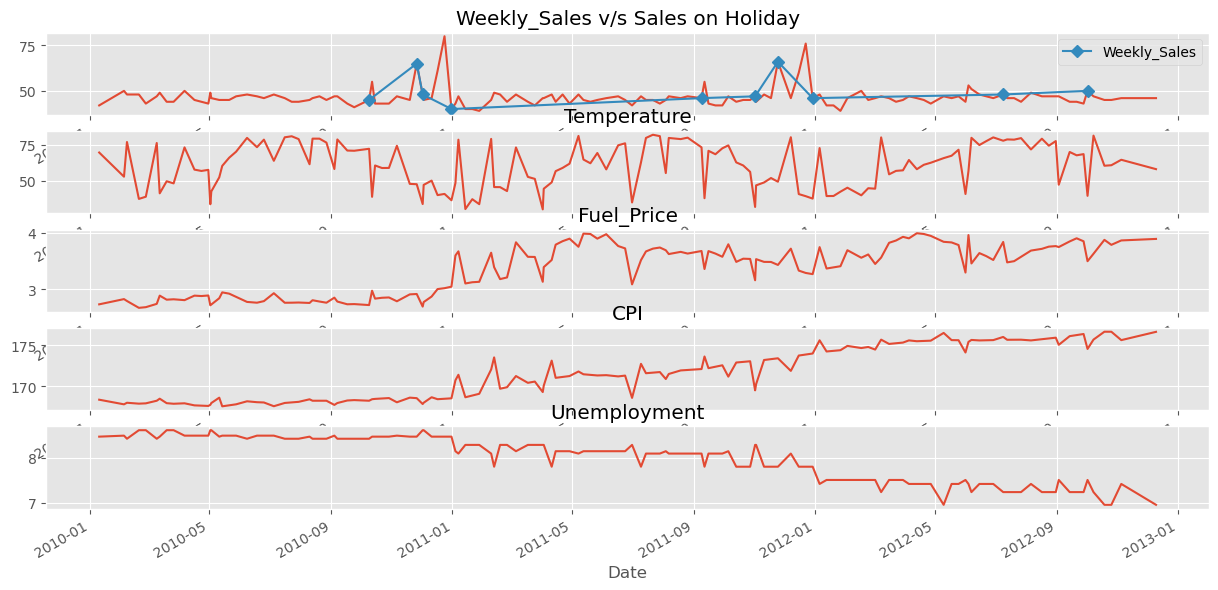

In [68]:
fig, ax = plt.subplots(5,1, figsize=(15,7))
both_data['Weekly_Sales'].plot(ax=ax[0], title= 'Weekly_Sales v/s Sales on Holiday')
both_data[both_data.IsHoliday==True]['Weekly_Sales'].plot(marker = 'D',ax=ax[0],legend= 'Holiday Week Sale')
both_data['Temperature'].plot(ax=ax[1], title='Temperature')
both_data['Fuel_Price'].plot(ax=ax[2], title='Fuel_Price')
both_data['CPI'].plot(ax=ax[3], title='CPI')
both_data['Unemployment'].plot(ax=ax[4], title='Unemployment')

<AxesSubplot:>

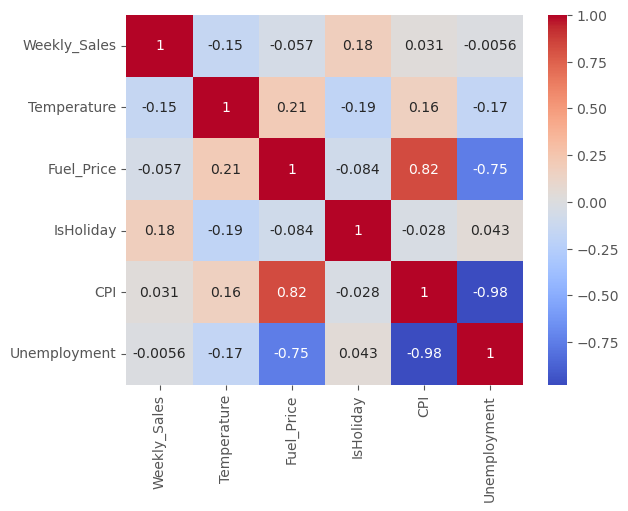

In [69]:
both_data.corr()
sns.heatmap(both_data.corr(), annot=True,cmap='coolwarm')

**In summary 🦖**

*1. Weekly sales do not exhibit a strong correlation with other parameters.*

*2. Consumer Price Index (CPI) and Unemployment display a negative correlation, while Fuel Price shows a positive correlation.*

*3. Unemployment and Fuel Price are also negatively correlated.*

Text(0, 0.5, 'Sales')

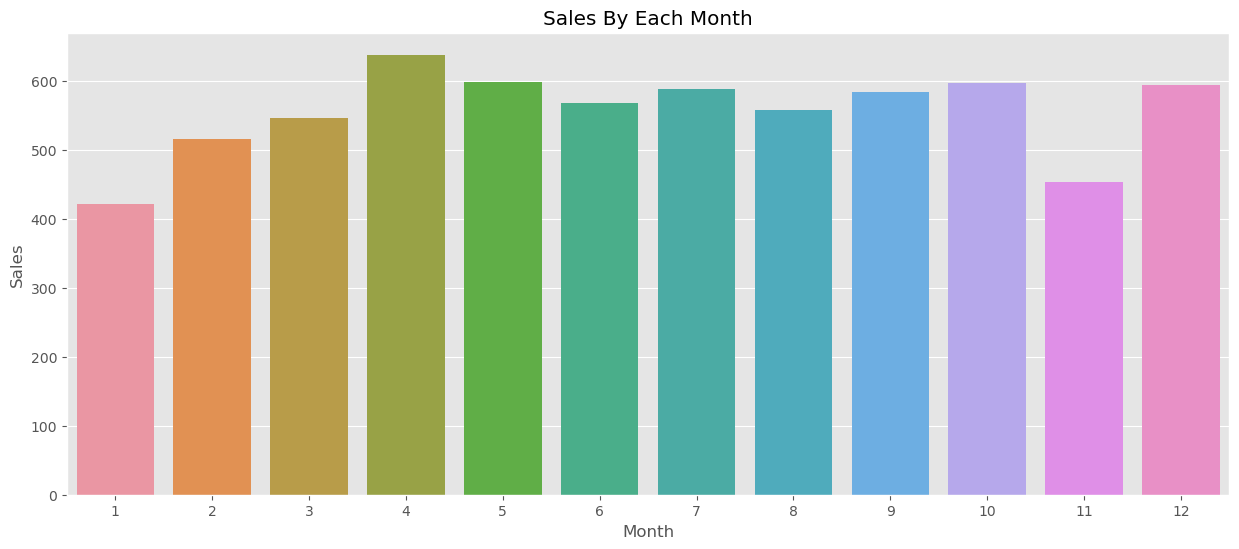

In [73]:
dt_sales_month = both_data.groupby(both_data.index.month).agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(15,6))
sns.barplot(x = dt_sales_month.index, y = dt_sales_month.Weekly_Sales)
plt.title('Sales By Each Month')
plt.xlabel('Month')
plt.ylabel('Sales')

**In summary 🦖**

*1. Sales tend to rise significantly during special offers and holidays (e.g., Black Friday, Christmas, New Year), followed by a decline. Subsequently, sales regain momentum in certain months.*


*2. November indicates reduced buying, possibly due to anticipation of upcoming sales.*


*3. December 2013 data appears incomplete; despite the spike, overall sales did not reach substantial heights due to limited available data.*

Text(0, 0.5, 'Sales')

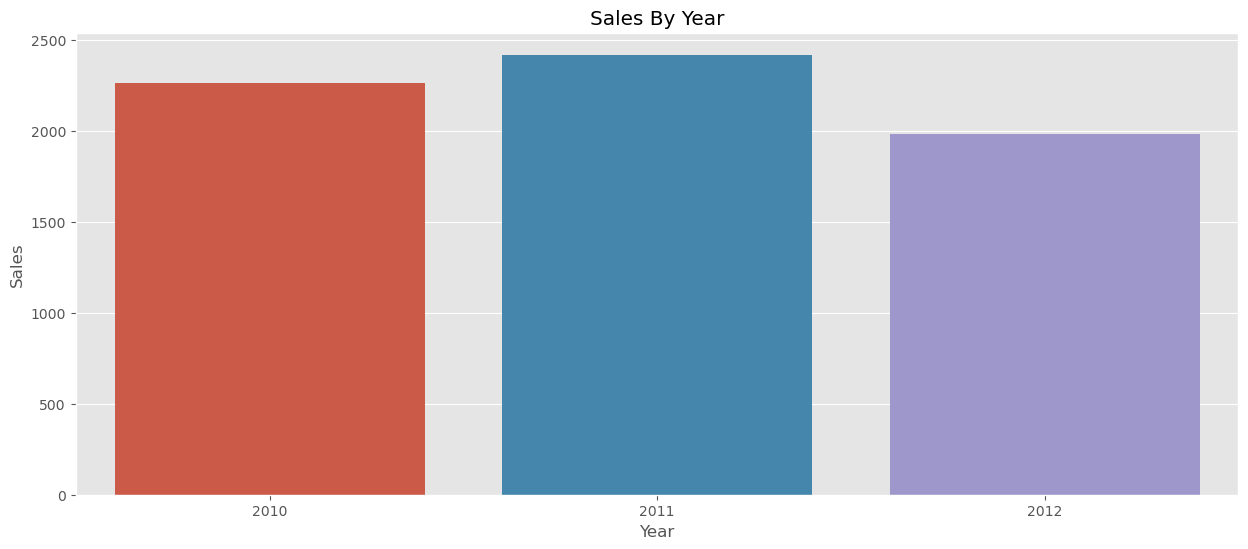

In [71]:
dt_sales_year = both_data.groupby(both_data.index.year).agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(15,6))
sns.barplot(x = dt_sales_year.index, y = dt_sales_year.Weekly_Sales)
plt.title('Sales By Year')
plt.xlabel('Year')
plt.ylabel('Sales')

**The seasonal_decompose function in statsmodels.tsa.seasonal library decomposes time series data into trend, seasonality, and residuals, aiding in understanding patterns and structures. It is valuable for time series analysis and forecasting.**

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(both_data["Weekly_Sales"], period=45)

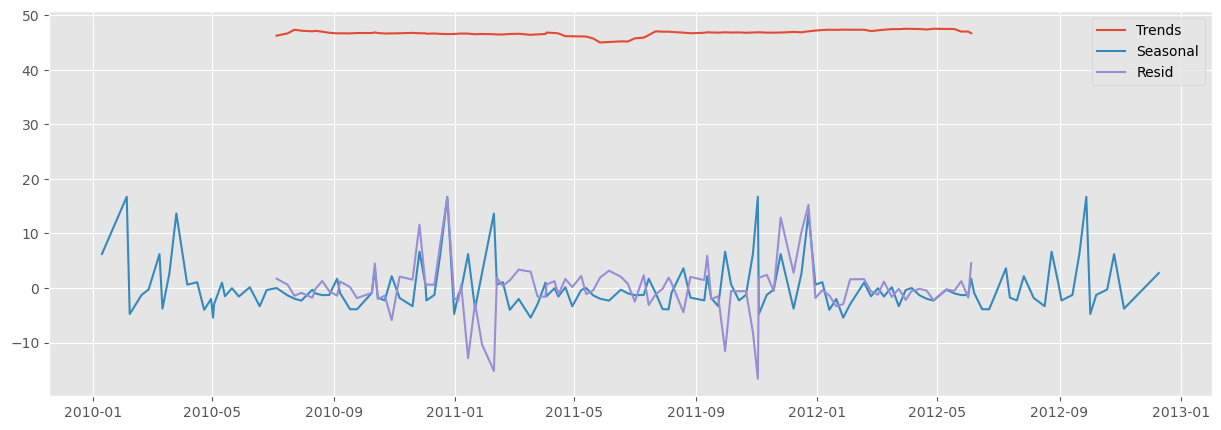

In [75]:
plt.figure(figsize=(15,5))
plt.grid('darkgrid')
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(['Trends','Seasonal', 'Resid'], loc = 'upper right')
plt.show()

*It shows a Sideway Trend*

**Evaluation based on Stores**

*lets explore the pattern in store for weekly sales data*

In [76]:
print(df_features.columns)
print(df_sales.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [77]:
store_data = df_features.groupby('Store').agg({'Temperature': 'mean', 'Fuel_Price': 'mean', 'IsHoliday': 'sum'})
temp_store = df_sales.groupby('Store').agg({'Weekly_Sales': 'sum'})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)

store_data.set_index(np.arange(0,45), inplace=True)
df_stores['Temp'] = store_data.Temperature
df_stores['Fuel_Price'] = store_data.Fuel_Price
df_stores['Holiday'] = store_data.IsHoliday
df_stores['Week_Sales'] = temp_store.Weekly_Sales

In [78]:
print(df_stores.describe())

           Store           Size       Temp  Fuel_Price  Holiday  Week_Sales
count  45.000000      45.000000  45.000000   45.000000     45.0   44.000000
mean   23.000000  130287.600000  59.356198    3.405992     13.0  150.090909
std    13.133926   63825.271991   9.956122    0.153935      0.0   78.780478
min     1.000000   34875.000000  37.921264    3.245945     13.0   37.000000
25%    12.000000   70713.000000  51.866319    3.259242     13.0   78.500000
50%    23.000000  126512.000000  58.107912    3.328764     13.0  140.500000
75%    34.000000  202307.000000  68.504670    3.497874     13.0  200.750000
max    45.000000  219622.000000  75.438077    3.643654     13.0  301.000000


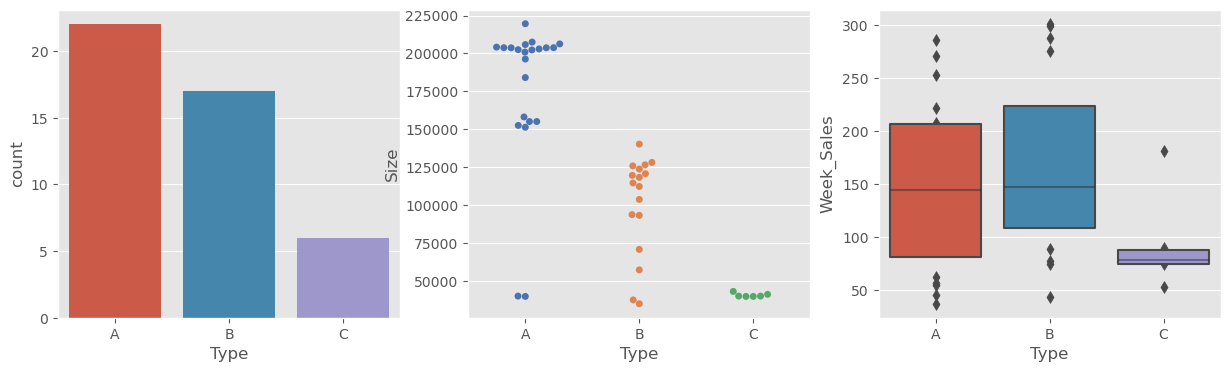

In [79]:
fig,ax = plt.subplots(1,3,figsize=(15, 4))
count = sns.countplot(x=df_stores.Type, ax=ax[0])
swarm = sns.swarmplot(data=df_stores, y='Size', x='Type', ax=ax[1],  palette="deep")
box = sns.boxenplot(data=df_stores, y= 'Week_Sales', x='Type', ax=ax[2])

**In Summary 🦖**


*1. A has the highest store count, followed by B, and C has the fewest.*

*2. In terms of size, A accommodates the most items, followed by B, and C has the least.*

*3. Surprisingly, despite fewer stores and a smaller size, B achieves the highest weekly sales compared to A and C.*

**Assessment based on Departments**

*A Little bit Invesigation on Department*

In [80]:
df_sales.sample()

,Store,Dept,Date,Weekly_Sales,IsHoliday
311736,32,79,2010-05-28,14660.28,False


In [81]:
len(df_sales['Dept'].unique())

81

In [82]:
dept_data = df_sales.groupby('Dept').agg({'Weekly_Sales': 'sum'})
dept_data.Weekly_Sales = dept_data.Weekly_Sales/10000
dept_data.Weekly_Sales = dept_data.Weekly_Sales.apply(int)
dept_data.sort_values(by='Weekly_Sales').head(10)

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
77,4
45,4
99,35
54,51


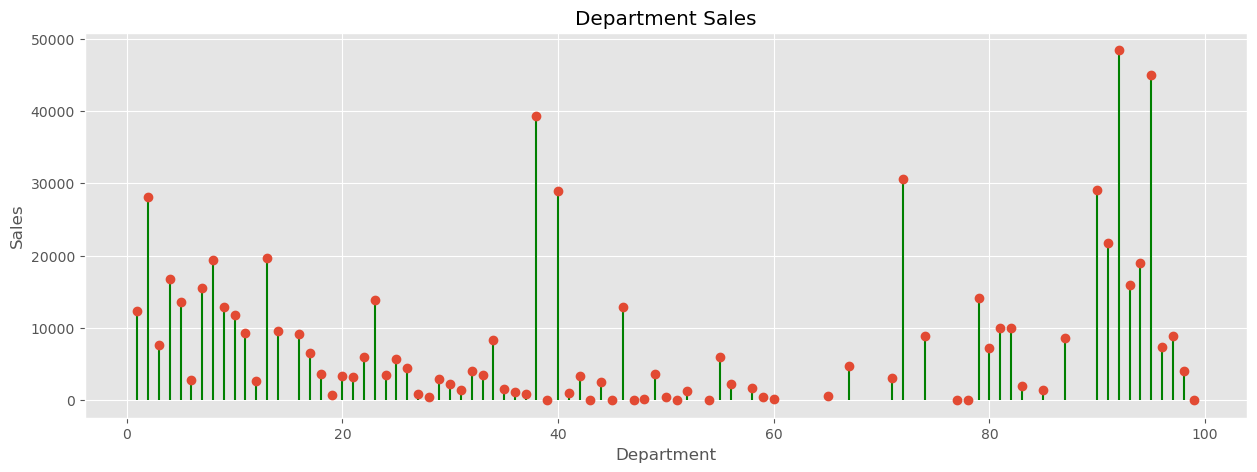

In [83]:
fig, ax = plt.subplots(figsize=(15,5))
plt.vlines(x=dept_data.index, ymin=0, ymax=dept_data['Weekly_Sales'], color='green')
plt.plot(dept_data.index, dept_data['Weekly_Sales'], 'o')
plt.title('Department Sales')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.show()

**In summary 🦖**

*1. Departments 1-15 and 90-95 demonstrate higher weekly sales.*

*2. Additionally, departments 38, 40, and 72 exhibit higher weekly sales.*

# Examination of Store Types and Year/Month Breakdown

In [85]:
df_sales.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [87]:
ddf_sales = df_sales.groupby(['Store', 'Date']).agg({'Weekly_Sales': 'sum'})
ddf_sales.sort_index(inplace=True)
ddf_sales.Weekly_Sales = ddf_sales.Weekly_Sales/10000
ddf_sales.Weekly_Sales = ddf_sales.Weekly_Sales.apply(int)
df_table = pd.merge(df_features, ddf_sales, how='left', on = ['Store','Date'])
df_table = pd.merge(df_table, df_stores[['Store','Type']], how='left', on=['Store'])
df_table.head(20)
df_tables = df_table[df_table.Weekly_Sales.notnull()]
df_tab = df_table[df_table.Weekly_Sales.isnull()]

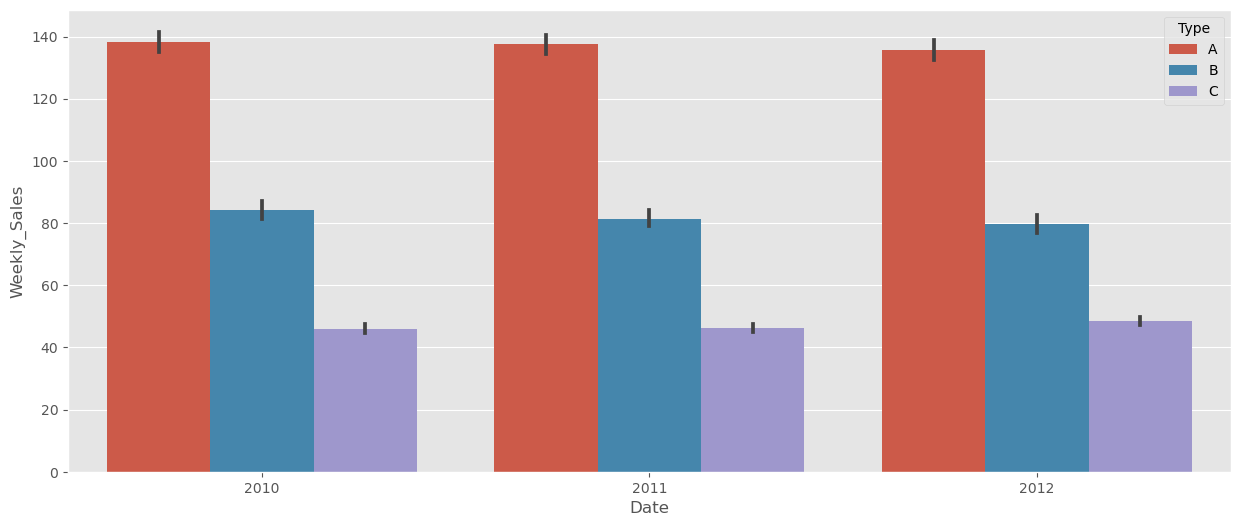

In [88]:
plt.figure(figsize=(15,6))
sns.barplot(x=df_tables.Date.dt.year, y= df_tables.Weekly_Sales, hue=df_tables.Type)
plt.show()

**In summary 🦖**

*1. Store Types A and B experienced a minor decrease in sales on a yearly basis.*

*2. Conversely, Store Type C saw a slight increase in sales over the years.*

# Study of Markdowns

In [89]:
df_table.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type'],
      dtype='object')

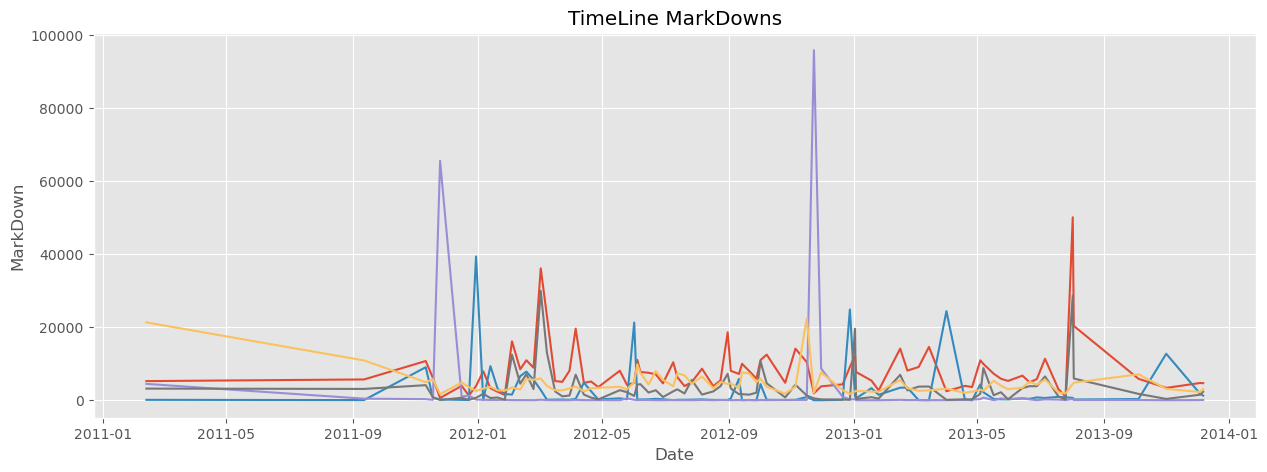

In [90]:
plt.figure(figsize=(15,5))
dt_markdown = df_table[df_table.MarkDown2.notnull()]
dt_markdown = dt_markdown.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean',
                                               'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
plt.plot(dt_markdown.index,dt_markdown.MarkDown1)
plt.plot(dt_markdown.index, dt_markdown.MarkDown2)
plt.plot(dt_markdown.index, dt_markdown.MarkDown3)
plt.plot(dt_markdown.index, dt_markdown.MarkDown4)
plt.plot(dt_markdown.index, dt_markdown.MarkDown5)
plt.title('TimeLine MarkDowns')
plt.ylabel('MarkDown')
plt.xlabel('Date')
plt.show()

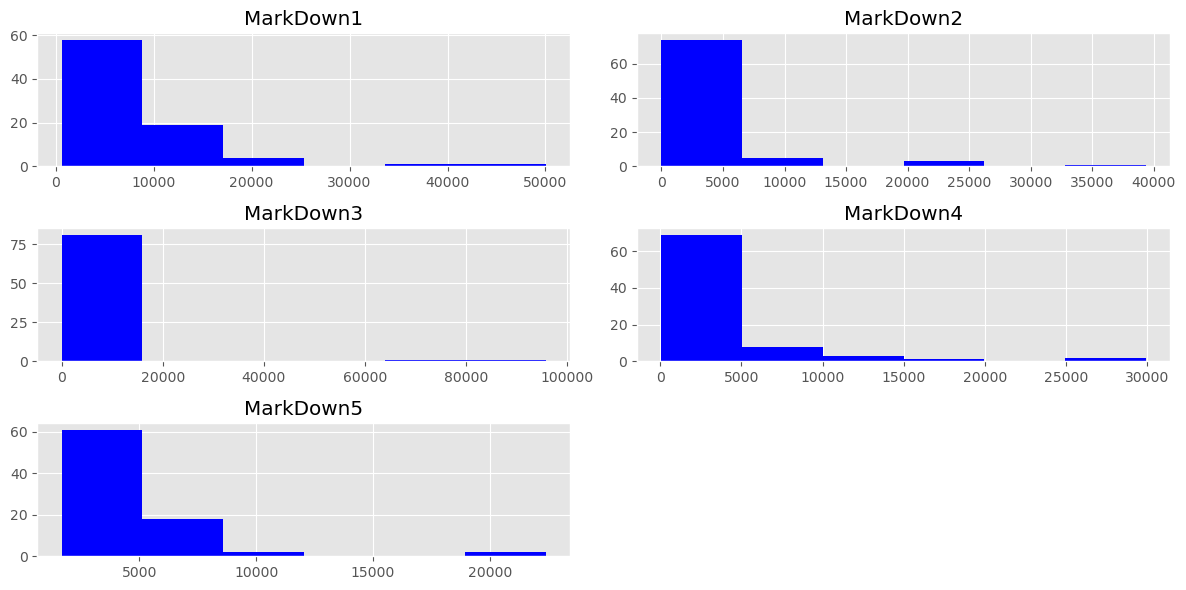

In [91]:
dt_markdown.hist(figsize=(12,6), bins=6, color='b')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'MarkDown')

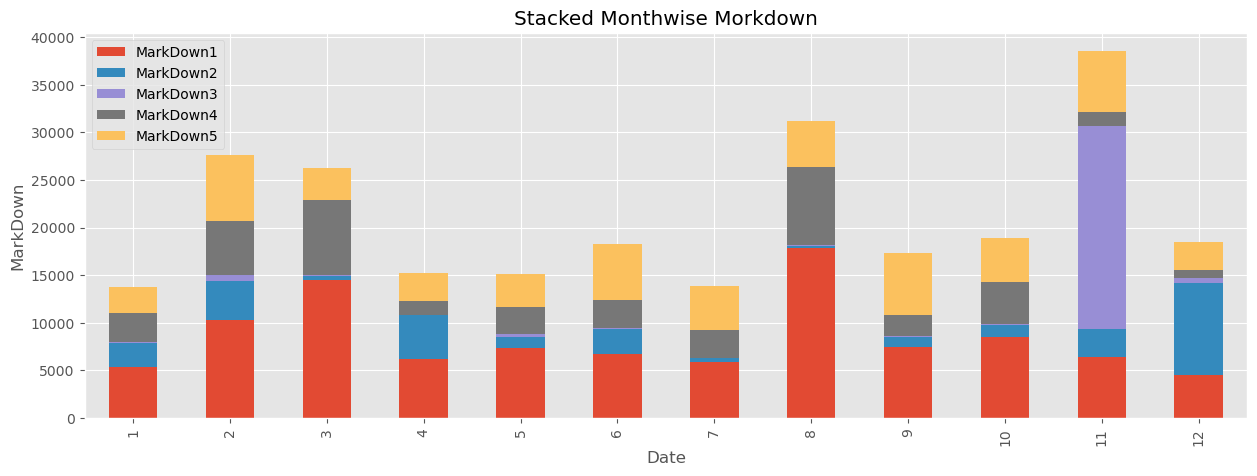

In [92]:
dt_markdown_month = dt_markdown.groupby(dt_markdown.index.month).agg({'MarkDown1': 'mean','MarkDown2': 'mean',
                                                                      'MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
dt_markdown_month.plot(kind='bar', stacked=True, figsize=(15,5))
plt.title('Stacked Monthwise Morkdown')
plt.ylabel('MarkDown')

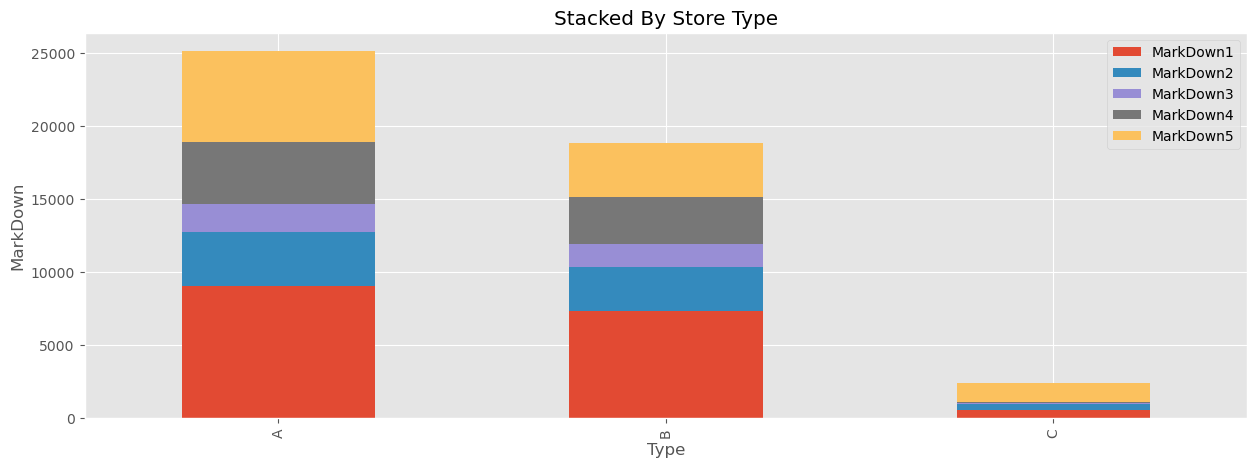

In [93]:
dt_markdown1 = df_tables[df_tables.MarkDown2.notnull()]
dt_markdown_type = dt_markdown1.groupby('Type').agg({'MarkDown1':'mean', 'MarkDown2':'mean', 'MarkDown3':'mean',
                                                    'MarkDown4':'mean', 'MarkDown5':'mean'})
dt_markdown_type.plot(kind='bar', stacked=True, figsize=(15,5))
plt.title('Stacked By Store Type')
plt.ylabel('MarkDown')
plt.show()

# Sales Trends by Time:

*Weekly sales surge by approximately 20% during November and December due to holiday promotions. Sales decline by approximately 15% in January post-holiday season.*

# Store Characteristics and Sales:

*Store Types A and B experience a slight yearly sales decrease of around 5% despite higher store counts. Store Type C maintains consistent sales and shows a slight yearly increase of about 3% in sales.*

# Department-wise Sales Analysis:

*Certain departments (1-15, 38, 40, 72, and 90-95) demonstrate notably higher weekly sales, with an average increase of 25%.*

# Splitting and Training the data

In [97]:
df_features.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')

In [105]:
both_data.columns

Index(['Weekly_Sales', 'Temperature', 'Fuel_Price', 'IsHoliday', 'CPI',
       'Unemployment'],
      dtype='object')

In [104]:
x= both_data.drop('Weekly_Sales',axis=1)
y=both_data['Weekly_Sales']

In [106]:
y

Date
2010-01-10    42
2010-02-04    50
2010-02-07    48
2010-02-19    48
2010-02-26    43
              ..
2012-10-08    47
2012-10-19    45
2012-10-26    45
2012-11-05    46
2012-12-10    46
Name: Weekly_Sales, Length: 143, dtype: int64

**Splitting the dataset into Training Set and Test Set**

In [107]:
from sklearn.model_selection import train_test_split

In [119]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=1/3,
  random_state=85)

**Feature Scaling**

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
sc= StandardScaler()

In [123]:
xtrain=sc.fit_transform(xtrain)
xtest= sc.transform(xtest)

In [124]:
xtrain

array([[ 7.69720890e-01,  7.18891993e-01, -2.59645393e-01,
         1.24582372e+00, -1.18845272e+00],
       [-3.34752361e-01,  7.33310763e-01, -2.59645393e-01,
        -2.91663892e-01,  3.77560696e-01],
       [ 3.63526472e-01,  1.08929064e+00, -2.59645393e-01,
         1.54418079e+00, -2.18692500e+00],
       [ 1.11677549e+00, -1.41033245e+00, -2.59645393e-01,
        -1.23815874e+00,  9.74395811e-01],
       [-9.92384753e-01, -4.85629827e-01, -2.59645393e-01,
        -6.79558092e-01,  6.79931750e-01],
       [ 2.98567162e-01,  1.43518266e+00, -2.59645393e-01,
        -1.03465652e-01,  3.77560696e-01],
       [ 1.64178934e-01,  2.41805016e-01, -2.59645393e-01,
         3.64789774e-01, -3.63886661e-01],
       [-1.06523337e+00,  1.53971999e-01, -2.59645393e-01,
         8.80917861e-01, -9.98113282e-01],
       [-2.41955489e-01,  1.37444425e+00, -2.59645393e-01,
         1.18658267e+00, -1.18845272e+00],
       [-1.20551608e+00,  5.85862930e-02, -2.59645393e-01,
         8.55586269e-01

**Logistic Regression**

In [125]:
from sklearn.linear_model import LogisticRegression

In [126]:
lg= LogisticRegression()

In [127]:
lg.fit(xtrain,ytrain)

LogisticRegression()

In [128]:
y_predict= lg.predict(xtest)

In [129]:
from sklearn.metrics import accuracy_score,classification_report,f1_score,confusion_matrix,ConfusionMatrixDisplay

In [130]:
Accuracy= accuracy_score(ytest,y_predict)

In [131]:
print('Accuracy on training data: ', Accuracy)

Accuracy on training data:  0.16666666666666666


In [132]:
print(classification_report(ytest,y_predict))

              precision    recall  f1-score   support

          40       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         1
          43       0.00      0.00      0.00         7
          44       0.00      0.00      0.00         7
          45       0.17      0.22      0.19         9
          46       0.09      0.14      0.11         7
          47       0.50      0.45      0.48        11
          48       0.00      0.00      0.00         1
          49       0.00      0.00      0.00         1
          50       0.00      0.00      0.00         1
          65       0.00      0.00      0.00         1
          66       0.00      0.00      0.00         1
          80       0.00      0.00      0.00         1

    accuracy                           0.17        48
   macro avg       0.06      0.06      0.06        48
weighted avg       0.16      0.17      0.16        48



**DecisionTreeRegressor**

In [120]:
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(random_state=0)
regr.fit(xtrain , ytrain)
y_hat = regr.predict(xtest)

from sklearn.metrics import r2_score
print("r2_score:" , "\n" ,r2_score(ytest , y_hat) , "\n")
print("Training Score:\n",regr.score(xtrain,ytrain)*100)

r2_score: 
 0.17816145015849572 

Training Score:
 100.0
